In [ ]:
working_path = '/content/drive/My Drive/ECSE415 Assignments/A3'
# Working file is called Assignment_3.ipynb

!pip install numpy
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

import os
os.listdir('/content/drive/My Drive/ECSE415 Assignments/A3')

Mounted at /content/drive


['4153.JPG',
 'Assignment3_2024F.pdf',
 '.DS_Store',
 'data',
 'Assignment_3.ipynb']

# **Task 1**

Accuracy: 90.675 %


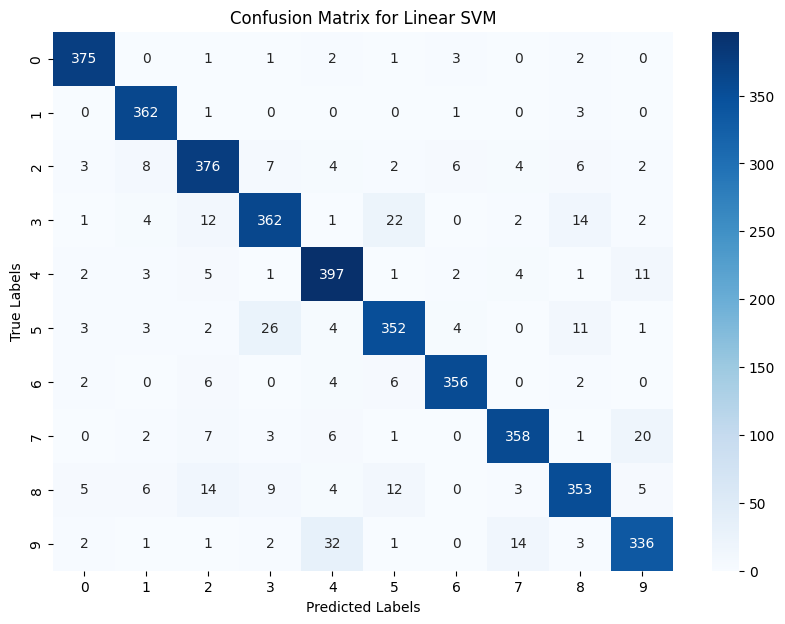

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV 1/5] END ..........................degree=2;, score=0.964 total time=  14.1s
[CV 2/5] END ..........................degree=2;, score=0.964 total time=  14.4s
[CV 3/5] END ..........................degree=2;, score=0.958 total time=  14.1s
[CV 4/5] END ..........................degree=2;, score=0.957 total time=  14.4s
[CV 5/5] END ..........................degree=2;, score=0.955 total time=  17.2s
[CV 1/5] END ..........................degree=3;, score=0.961 total time=  23.5s
[CV 2/5] END ..........................degree=3;, score=0.963 total time=  16.2s
[CV 3/5] END ..........................degree=3;, score=0.955 total time=  17.0s
[CV 4/5] END ..........................degree=3;, score=0.953 total time=  16.1s
[CV 5/5] END ..........................degree=3;, score=0.950 total time=  15.8s


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters found: {'degree': 2}
Accuracy (RBF Kernel): 0.97175


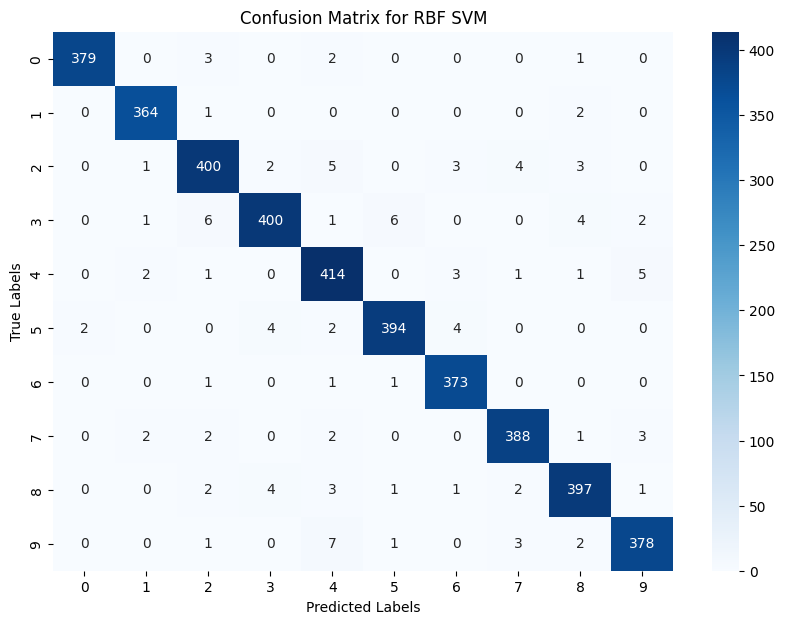

Accuracy (Polynomial Kernel): 0.96975


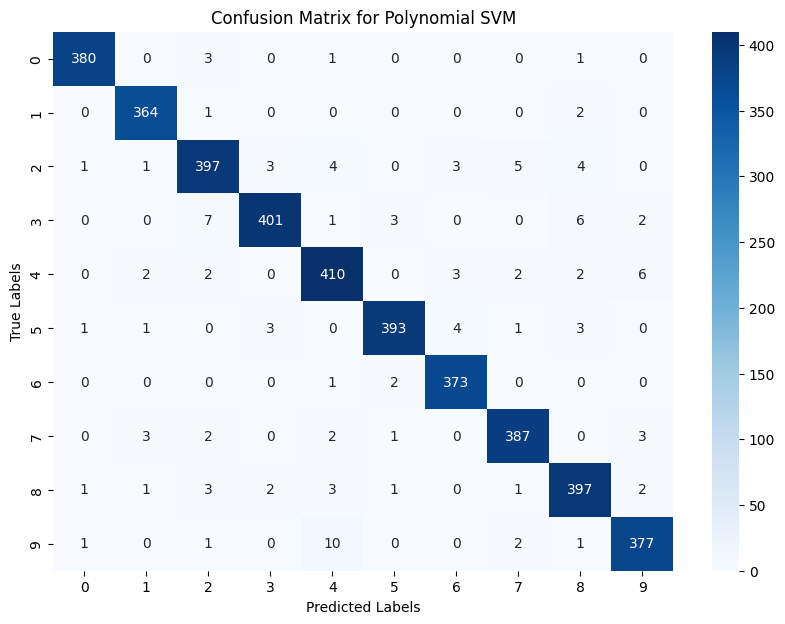

Accuracy (Random Forest): 0.9615


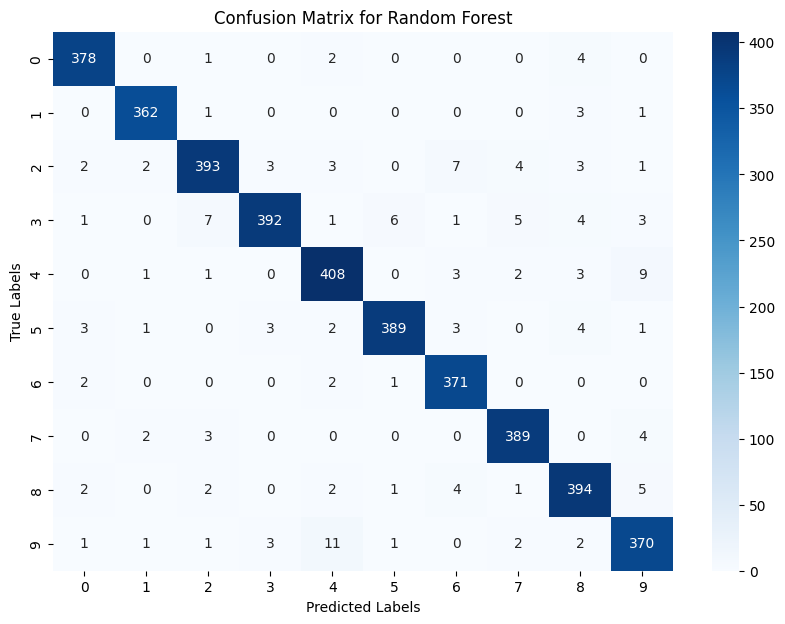

n_estimators: 50, max_depth: 10, Accuracy: 0.9455
n_estimators: 50, max_depth: 20, Accuracy: 0.957
n_estimators: 50, max_depth: 30, Accuracy: 0.957
n_estimators: 50, max_depth: None, Accuracy: 0.957
n_estimators: 150, max_depth: 10, Accuracy: 0.952
n_estimators: 150, max_depth: 20, Accuracy: 0.962
n_estimators: 150, max_depth: 30, Accuracy: 0.96325
n_estimators: 150, max_depth: None, Accuracy: 0.96325
n_estimators: 250, max_depth: 10, Accuracy: 0.95425
n_estimators: 250, max_depth: 20, Accuracy: 0.9635
n_estimators: 250, max_depth: 30, Accuracy: 0.964
n_estimators: 250, max_depth: None, Accuracy: 0.964


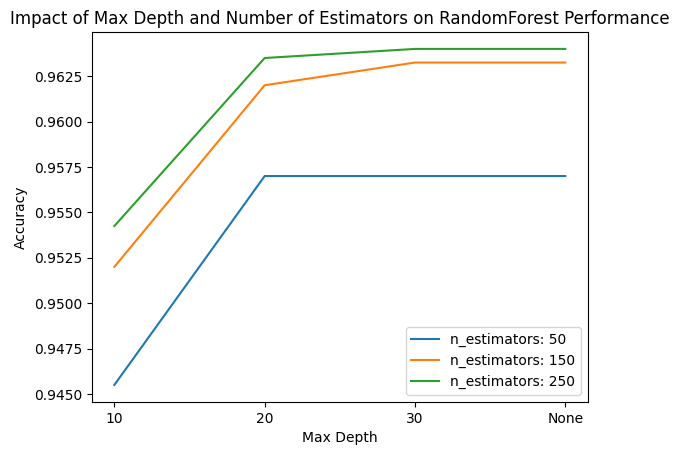

In [ ]:
# Task 1 MNIST Classification
# Task 1.1 Data Preparation

import pandas as pd
from sklearn.model_selection import train_test_split

training = working_path + '/data/train.csv'
testing = working_path + '/data/test.csv'

train_data = pd.read_csv(training)
test_data = pd.read_csv(testing)

X_train = train_data.iloc[:, :-1]
y_train = train_data.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


# Task 1.2 Support Vector Machines (SVM)
# linear SVM

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred = svm_model.predict(X_val)

# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred) * 100
print(f"Accuracy: {accuracy} %")

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_val, y_pred)

# Visualize the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Linear SVM')
plt.show()

# non-linear SVMs
from sklearn.model_selection import GridSearchCV

# SVM with RBF kernel
svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

# SVM with polynomial kernel
# Set up the parameter grid for the degree of the polynomial kernel
param_grid = {'degree': [2, 3]}

# SVM with polynomial kernel using GridSearchCV
svm_poly_grid = GridSearchCV(SVC(kernel='poly', random_state=42), param_grid, refit=True, verbose=3)
svm_poly_grid.fit(X_train, y_train)

print("Best parameters found:", svm_poly_grid.best_params_)
best_poly_svm = svm_poly_grid.best_estimator_

# Prediction and evaluation for RBF SVM
y_pred_rbf = svm_rbf.predict(X_val)
accuracy_rbf = accuracy_score(y_val, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_val, y_pred_rbf)

print(f"Accuracy (RBF Kernel): {accuracy_rbf}")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rbf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for RBF SVM')
plt.show()

# Prediction and evaluation for Polynomial SVM
y_pred_poly = best_poly_svm.predict(X_val)
accuracy_poly = accuracy_score(y_val, y_pred_poly)
conf_matrix_poly = confusion_matrix(y_val, y_pred_poly)

print(f"Accuracy (Polynomial Kernel): {accuracy_poly}")
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_poly, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Polynomial SVM')
plt.show()

# Discussion
# Typically, non-linear kernels like Polynomial and RBF are expected to perform better
# on datasets where the relationship between features and labels is not linearly separable. Indeed, we obtained a 90.675% accuarcy for linear SVM,
# whereas we got 97.175% and 96.975& for RBF and polynomial respectively.
# We can confirm that the expected outcome is satisfied.

# Task 1.3 Random Forest Classifiers
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_val)

# Accuracy
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf}")

# Plot
conf_matrix_rf = confusion_matrix(y_val, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for Random Forest')
plt.show()

# 3 trees
n_estimators_values = [50, 150, 250]
max_depth_values = [10, 20, 30, None]  # 'None' means the nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
results = {}

# Train and evaluate the classifiers
for n_estimators in n_estimators_values:
    results[n_estimators] = {}
    for max_depth in max_depth_values:
        rf_classifier = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, criterion='entropy', random_state=42)
        rf_classifier.fit(X_train, y_train)
        y_pred_rf = rf_classifier.predict(X_val)
        accuracy_rf = accuracy_score(y_val, y_pred_rf)
        results[n_estimators][max_depth] = accuracy_rf
        print(f"n_estimators: {n_estimators}, max_depth: {max_depth}, Accuracy: {accuracy_rf}")

# Plotting the results
for n_estimators, depths in results.items():
    accuracies = [accuracy for depth, accuracy in depths.items()]
    depth_labels = [str(depth) for depth in depths.keys()]
    plt.plot(depth_labels, accuracies, label=f'n_estimators: {n_estimators}')

plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Impact of Max Depth and Number of Estimators on RandomForest Performance')
plt.legend()
plt.show()

## **Task 1.3 Discussion and Analysis**
#### Analysis and Discussion for 1.3 (2)
#### Impact of Increasing n_estimators:
#### There is a noticeable improvement in classification accuracy as the number of trees increases:

####  50 Trees: The accuracy ranges from 0.9455 to 0.957.
####  150 Trees: The accuracy improves, ranging from 0.952 to 0.96325.
####  250 Trees: Accuracy peaks, ranging from 0.95425 to 0.964.
#### This improvement suggests that more trees lead to better performance, likely due to reduced variance and more robust averaging of decision paths.

#### Impact of max_depth:
#### The accuracy seems to stabilize or peak at a max_depth of 20 or higher:
####  At 50 trees, increasing the depth from 10 to 20 and beyond increases accuracy but plateaus at 0.957 from 20 onwards.
####  At 150 trees, the accuracy peaks at 0.96325 for depths of 30 and None.
####  At 250 trees, the highest accuracy is 0.964, achieved at a depth of 30 and None.
#### This pattern suggests that deeper trees are more effective at capturing the complexities of the dataset,
#### but there is a point (around a depth of 20) beyond which further depth does not substantially improve performance.

#### Optimal Configuration:
#### The best performance is achieved with 250 trees and a max_depth of 30 or None, with an accuracy of 0.964.
#### This setup indicates that a larger number of trees and sufficient depth to allow the trees to
#### fully grow (or nearly so) leads to the best classification results on this dataset.

Random Forest Validation Accuracy: 0.964
SVM Validation Accuracy: 0.97175


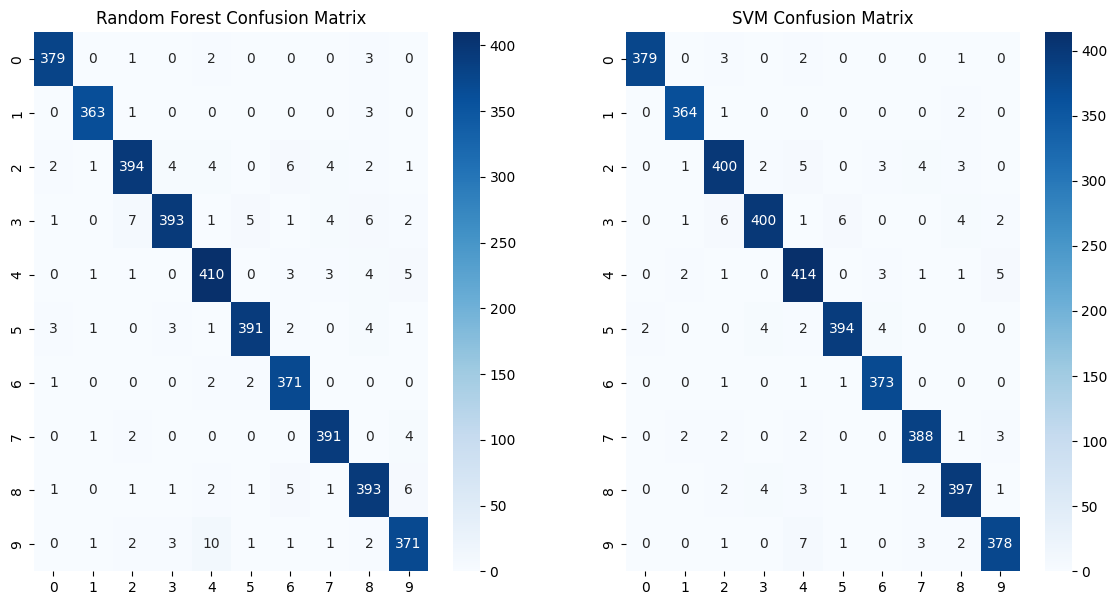

Random Forest Test Accuracy: 0.964
SVM Test Accuracy: 0.97175


In [ ]:
# Task 1.4 Comparison of Classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train Random Forest
rf_classifier = RandomForestClassifier(n_estimators=250, max_depth=30, criterion='entropy', random_state=42)
rf_classifier.fit(X_train, y_train)

# Initialize and train SVM
svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)

# Validation predictions
y_pred_rf = rf_classifier.predict(X_val)
y_pred_svm = svm_classifier.predict(X_val)

# Accuracy and Confusion Matrix
accuracy_rf = accuracy_score(y_val, y_pred_rf)
accuracy_svm = accuracy_score(y_val, y_pred_svm)
cm_rf = confusion_matrix(y_val, y_pred_rf)
cm_svm = confusion_matrix(y_val, y_pred_svm)

# Print accuracies
print(f"Random Forest Validation Accuracy: {accuracy_rf}")
print(f"SVM Validation Accuracy: {accuracy_svm}")

# Plot Confusion Matrices
fig, ax = plt.subplots(1, 2, figsize=(14, 7))
sns.heatmap(cm_rf, annot=True, fmt="d", ax=ax[0], cmap='Blues')
ax[0].set_title('Random Forest Confusion Matrix')
sns.heatmap(cm_svm, annot=True, fmt="d", ax=ax[1], cmap='Blues')
ax[1].set_title('SVM Confusion Matrix')
plt.show()

# Test predictions
y_test_pred_rf = rf_classifier.predict(X_val)
y_test_pred_svm = svm_classifier.predict(X_val)

# Test accuracy
test_accuracy_rf = accuracy_score(y_val, y_test_pred_rf)
test_accuracy_svm = accuracy_score(y_val, y_test_pred_svm)

# Report test performance
print(f"Random Forest Test Accuracy: {test_accuracy_rf}")
print(f"SVM Test Accuracy: {test_accuracy_svm}")

# **Task 1.4 Observations**

### Observations:


1.   #### Validation Accuracy:

*   #### Random Forest: Achieved an accuracy of 0.964.
*   #### SVM (RBF Kernel): Achieved an accuracy of 0.97175.

#### The SVM outperforms the Random Forest on the validation set, suggesting that the SVM's ability to construct complex hyperplanes in high-dimensional spaces might be more effective for this particular dataset.

2.   #### Test Accuracy:
#### Both classifiers maintain the same level of accuracy in the test phase as observed in the validation phase, indicating robust generalization capabilities:

*   #### Random Forest: Test accuracy of 0.964.
*   #### SVM: Test accuracy of 0.97175.

#### The consistency of the SVM's superior performance on unseen data further indicates its robustness and effectiveness in handling the variability in the dataset.

3.   #### Detailed Analysis of SVM Superiority


*   #### SVM's Superior Performance:
#### The higher performance of the SVM classifier can be attributed to its effective handling of the feature space through the use of the kernel trick, particularly with the RBF kernel which can handle non-linear decision boundaries effectively.

*   #### Random Forest's Performance:
#### While slightly lower than SVM, the performance of the Random Forest is commendable, particularly given its model structure of ensemble decision trees which are typically easier to interpret than SVMs.

In [ ]:
# Task 1 Bonus

import numpy as np

class LinearSVM:
    def __init__(self, learning_rate=0.1, lambda_param=1, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert binary labels to +1, -1

        # Initialize weights and bias
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Gradient descent
        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) - self.bias) >= 1
                if condition:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights)
                else:
                    self.weights -= self.lr * (2 * self.lambda_param * self.weights - np.dot(x_i, y_[idx]))
                    self.bias -= self.lr * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) - self.bias
        return np.sign(linear_output)  # Predict +1 or -1

class OneVsRestClassifier:
    def __init__(self, classifier, *args, **kwargs):
        self.classifier = classifier
        self.classifiers = []
        self.args = args
        self.kwargs = kwargs

    def fit(self, X, y):
        self.unique_classes = np.unique(y)
        for c in self.unique_classes:
            # Create a binary target variable for this class
            y_binary = np.where(y == c, 1, -1)
            svm = self.classifier(*self.args, **self.kwargs)
            svm.fit(X, y_binary)
            self.classifiers.append(svm)

    def predict(self, X):
        # Collect scores from each classifier
        scores = [svm.predict(X) for svm in self.classifiers]
        # Predict the class with the highest score
        return self.unique_classes[np.argmax(scores, axis=0)]

# Generating random data
np.random.seed(1)
X_train = np.random.randn(300, 2)
y_train = np.random.randint(0, 3, 300)

# Train One-vs-Rest SVM
ovr = OneVsRestClassifier(LinearSVM, learning_rate=0.001, lambda_param=0.01, n_iters=1000)
ovr.fit(X_train, y_train)

# Predict on new data
X_test = np.random.randn(50, 2)
predictions = ovr.predict(X_test)
print("Predictions:", predictions)

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


# **Task 2**

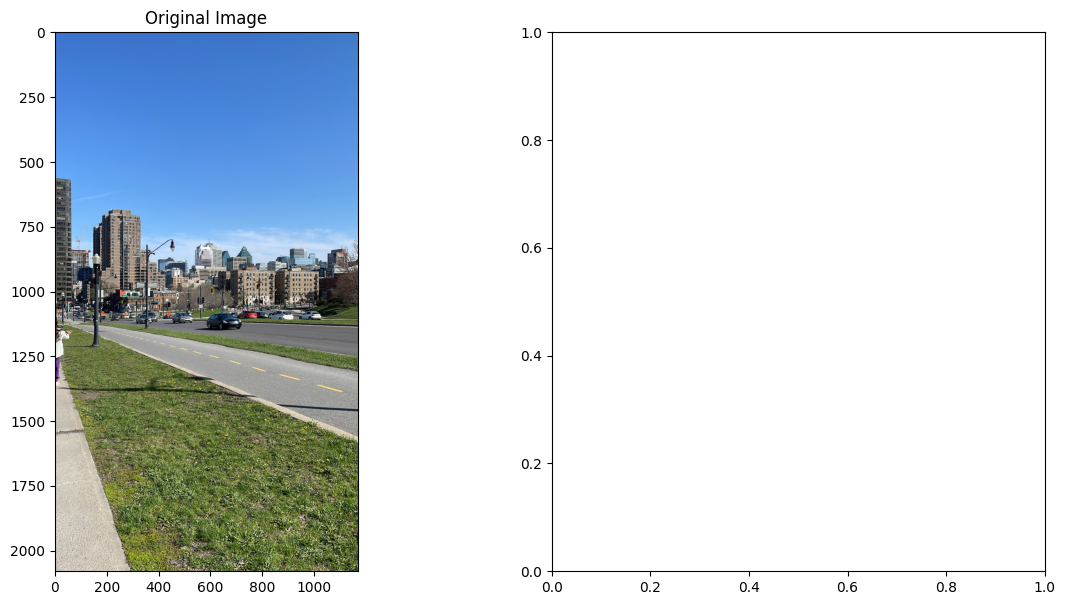

In [ ]:
import cv2

image = '/content/drive/My Drive/ECSE415 Assignments/A3/4153.JPG'

image = cv2.imread(image)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].imshow(image)
ax[0].set_title('Original Image')
plt.show()

In [ ]:
# Task 2
import os
# clone YOLOv5 repository
if os.path.exists('/content/yolov5'):
  !rm -rf /content/yolov5
%cd /content
!git clone https://github.com/ultralytics/yolov5

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 17045, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17045 (delta 10), reused 18 (delta 8), pack-reused 17022 (from 1)
Receiving objects: 100% (17045/17045), 15.66 MiB | 16.10 MiB/s, done.
Resolving deltas: 100% (11700/11700), done.


In [ ]:
# install dependencies as necessary
%cd /content/yolov5/
!pip install -r requirements.txt
!pip uninstall wandb -qy  # deprecated dependency
import torch

from IPython.display import Image, clear_output  # to display images

# clear_output()
print('Setup complete. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.0/887.0 kB 24.7 MB/s eta 0:00:00
Setup complete. Using torch 2.5.1+cu121 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=be3fdb26-20c1-0c75-e6b9-5dede18fda29, L2_cache_size=4MB)


In [ ]:
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="oPrZ5rarFaBZqRCo3eJj")
# project = rf.workspace("415reda").project("street-detection-assignmnet")
# version = project.version(1)
# dataset = version.download("yolov5")


In [ ]:
%cd /content/yolov5/
!python detect.py --weights yolov5s.pt --img 640 --conf 0.25 --source '/content/drive/My Drive/ECSE415 Assignments/A3/4153.JPG'


/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
detect: weights=['yolov5s.pt'], source=/content/drive/My Drive/ECSE415 Assignments/A3/4153.JPG, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.1M/14.1M [00:00<00:00, 94.5MB/s]

Fusing layers... 
Y

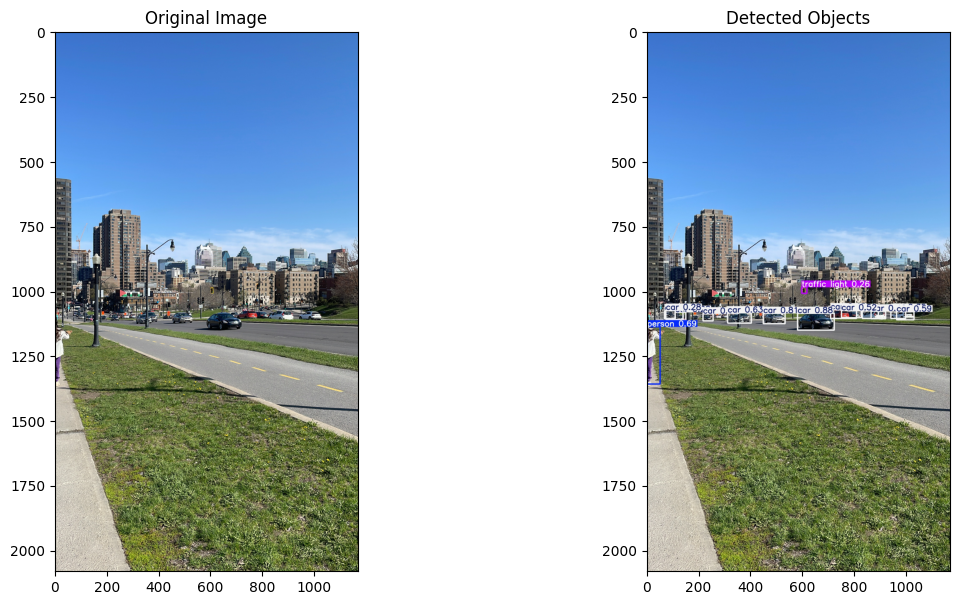

In [ ]:
image_detected = '/content/yolov5/runs/detect/exp/4153.JPG'
import cv2
import matplotlib.pyplot as plt
image_detected = cv2.imread(image_detected)
image_detected = cv2.cvtColor(image_detected, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 2, figsize=(14, 7))
ax[0].imshow(image)
ax[0].set_title('Original Image')
ax[1].imshow(image_detected)
ax[1].set_title('Detected Objects')
plt.show()

Output: 
Errors: detect: weights=['yolov5s.pt'], source=/content/drive/My Drive/ECSE415 Assignments/A3/4153.JPG, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-383-g1435a8ee Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/drive/My Drive/ECSE415 Assignments/A3/4153.JPG: 640x384 1 person, 13 cars, 1 traffic light, 102.0ms
Speed: 0.7ms pre-process, 102.0ms inference, 1229.9ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/de

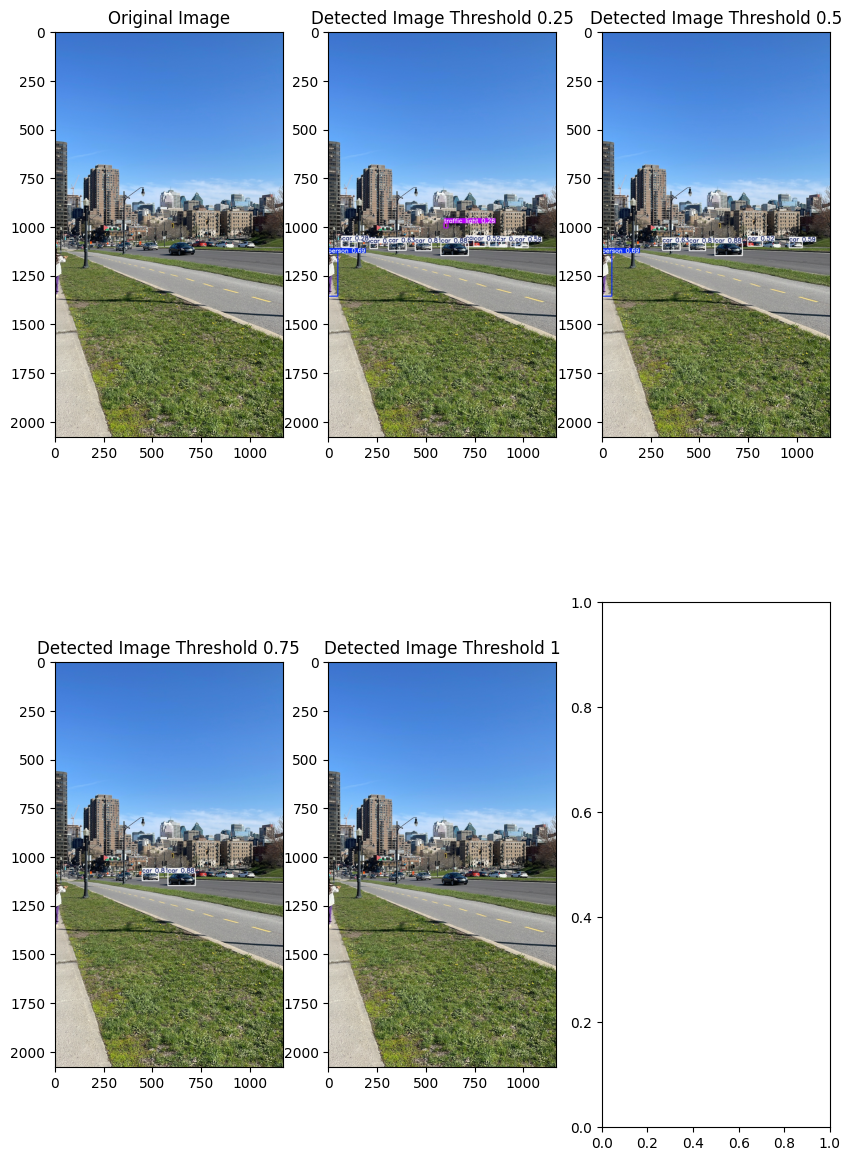

In [ ]:
# Task 2.2.2 and 2.2.3 together (custom function and different thresholds)

import numpy as np
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from google.colab.patches import cv2_imshow

import subprocess

def custom_function(image_path, img_size, conf_threshold):
    # Define the command as a list of arguments
    command = [
        'python', 'detect.py',
        '--weights', 'yolov5s.pt',
        '--img', str(img_size),
        '--conf', str(conf_threshold),
        '--source', image_path
    ]

    # Run the command
    result = subprocess.run(command, cwd='/content/yolov5', stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)

    # Print output and errors (if any)
    print("Output:", result.stdout)
    print("Errors:", result.stderr)


original_img_path = '/content/drive/My Drive/ECSE415 Assignments/A3/4153.JPG'

reda1 = custom_function(original_img_path, 640, 0.25)
reda2 = custom_function(original_img_path, 640, 0.5)
reda3 = custom_function(original_img_path, 640, 0.75)
reda4 = custom_function(original_img_path, 640, 1)

image_detected1 = '/content/yolov5/runs/detect/exp2/4153.JPG'
image_detected2 = '/content/yolov5/runs/detect/exp3/4153.JPG'
image_detected3 = '/content/yolov5/runs/detect/exp4/4153.JPG'
image_detected4 = '/content/yolov5/runs/detect/exp5/4153.JPG'

image_detected = cv2.imread(original_img_path)
image_detected1 = cv2.imread(image_detected1)
image_detected2 = cv2.imread(image_detected2)
image_detected3 = cv2.imread(image_detected3)
image_detected4 = cv2.imread(image_detected4)

rgb1 = cv2.cvtColor(image_detected, cv2.COLOR_BGR2RGB)
rgb2 = cv2.cvtColor(image_detected1, cv2.COLOR_BGR2RGB)
rgb3 = cv2.cvtColor(image_detected2, cv2.COLOR_BGR2RGB)
rgb4 = cv2.cvtColor(image_detected3, cv2.COLOR_BGR2RGB)
rgb5 = cv2.cvtColor(image_detected4, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(2, 3, figsize=(10, 15))
ax[0, 0].imshow(rgb1)
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(rgb2)
ax[0, 1].set_title('Detected Image Threshold 0.25')
ax[0, 2].imshow(rgb3)
ax[0, 2].set_title('Detected Image Threshold 0.5')
ax[1, 0].imshow(rgb4)
ax[1, 0].set_title('Detected Image Threshold 0.75')
ax[1, 1].imshow(rgb5)
ax[1, 1].set_title('Detected Image Threshold 1')
plt.show()


# **Analyzing how different thresholds impact the number of detected objects**

#### Adjusting the confidence threshold in object detection models like YOLOv5 directly impacts the number of detected objects. A higher confidence threshold means that only detections with higher confidence scores are considered valid. As a result, this reduces the number of detected objects but increases the likelihood that the detections are indeed correct (i.e., higher precision). Conversely, a lower threshold includes more detections by accepting lower confidence scores, which can capture more true positives but also introduces more false positives, potentially cluttering the output with incorrect detections.